In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras.applications import resnet
from keras.layers import Flatten , Dense , Activation
from keras import optimizers , Sequential
from keras.optimizers import Adam
from keras import models , layers
from keras.layers import Input
from keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path='/content/drive/MyDrive/Dataset/train'
val_path='/content/drive/MyDrive/Dataset/val'
test_data='/content/drive/MyDrive/Dataset/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
val_datagen = ImageDataGenerator(rescale=1./255)
testdata_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=64,shuffle=True,class_mode='sparse')
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=64,shuffle=False,class_mode='sparse')
test_generator = testdata_datagen.flow_from_directory(test_data,target_size=(224,224),batch_size=64,shuffle=False,class_mode='sparse')


Found 994 images belonging to 4 classes.
Found 343 images belonging to 4 classes.
Found 184 images belonging to 4 classes.


In [ ]:
inc_model = tf.keras.applications.InceptionV3(pooling='max',
                    weights='imagenet',
                    include_top=False,
                    input_shape=(224,224,3))
for layers in inc_model.layers:
            layers.trainable=False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.layers import Input,BatchNormalization , Dropout

In [ ]:
model = Sequential()
model.add(inc_model)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2048)                │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_94               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,368,932 (85.33 MB)

 Trainable params: 562,052 (2.14 MB)

 Non-trainable params: 21,806,880 (83.19 MB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 497s 21s/step - accuracy: 0.4265 - loss: 1.3716 - val_accuracy: 0.6093 - val_loss: 1.0349
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 706ms/step - accuracy: 0.7119 - loss: 0.7843 - val_accuracy: 0.6851 - val_loss: 0.8099
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 728ms/step - accuracy: 0.7529 - loss: 0.6870 - val_accuracy: 0.6968 - val_loss: 0.6894
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 808ms/step - accuracy: 0.8154 - loss: 0.5519 - val_accuracy: 0.7522 - val_loss: 0.6083
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 699ms/step - accuracy: 0.8391 - loss: 0.4830 - val_accuracy: 0.7697 - val_loss: 0.5749
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 764ms/step - accuracy: 0.8090 - loss: 0.4782 - val_accuracy: 0.8017 - val_loss: 0.5237
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 632ms/step - accuracy: 0.8649 - loss: 0.4348 - val_accuracy: 0.8134 - val_loss: 0.4957
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 751ms/step - accuracy: 0.8770 - loss: 0.3579 - val_accuracy:

In [ ]:
model.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 18s/step - accuracy: 0.9724 - loss: 0.1073


[0.17441526055335999, 0.95652174949646]

In [ ]:
Y_pred = model.predict(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step


In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:

y_true = test_generator.classes

In [ ]:
cm = confusion_matrix(y_true, y_pred)

In [ ]:

cm_df = pd.DataFrame(cm,
                     index = ['CP','ME','MP','NL'],
                     columns = ['CP','ME','MP','NL'])

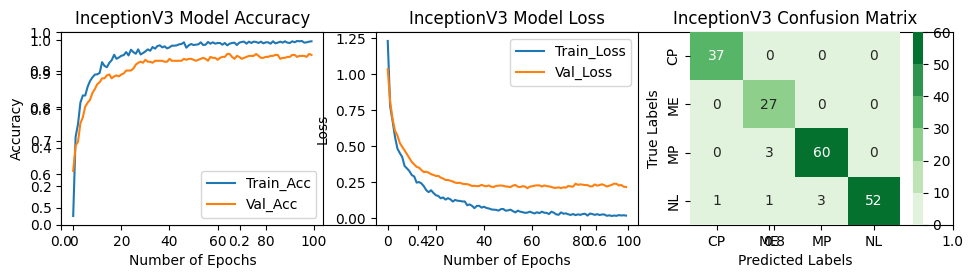

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.subplots(figsize=(11.5,2.5))
plt.subplot(1,3,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('InceptionV3 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Train_Acc', 'Val_Acc'], loc='lower right')

plt.subplot(1,3,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('InceptionV3 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train_Loss', 'Val_Loss'], loc='upper right')

plt.subplot(1,3,3)
#plt.figure(figsize=(3.5,2.5))
colormap = sns.color_palette("Greens")
sns.heatmap(cm_df,cmap=colormap, annot=True)
plt.title('InceptionV3 Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.87      1.00      0.93        27
           2       0.95      0.95      0.95        63
           3       1.00      0.91      0.95        57

    accuracy                           0.96       184
   macro avg       0.95      0.97      0.96       184
weighted avg       0.96      0.96      0.96       184

